In [77]:
import pandas as pd
import re
import string

In [3]:
reviews = pd.read_csv('newly_sampled_reviews.csv')

In [5]:
ids = reviews['recipe_id'].unique()

In [54]:
all_reviews = list(reviews[reviews['recipe_id']==424415]['review'])

In [65]:
d = {}

In [66]:
for recipe in ids:
    all_reviews = list(reviews[reviews['recipe_id']==recipe]['review'])
    corpus = ""
    for txt in all_reviews:
        corpus = corpus + ' ' + str(txt)
    
    d[recipe] = corpus

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [93]:
review_corpus = pd.DataFrame(d.items(),columns=['id','review'])

In [94]:
review_corpus

,id,review
0,85009,I made the Mexican topping and took it to bun...
1,424415,I really didn't expect to like this rice as m...
2,33486,This is pretty good !! I used frozen spinach ...
3,116953,this is a nice recipe to have if you make alo...
4,435357,This does have a nice fresh taste. I used cr...
...,...,...
14789,394419,This was so delicious! And I love the fact th...
14790,253419,Yummy! We didn't have any m&m's or chocolate ...
14791,290157,Yet another great spice mix (& that includes ...
14792,190698,I made this recipe with blackberry jam instea...


In [101]:
def preProcessing(doc):
    doc = doc.lower()
    doc = re.sub(r"[{}]".format(string.punctuation), "", doc)
    return doc

In [121]:
from nltk.stem import WordNetLemmatizer 

In [124]:
lemmatized_reviews = []
for review in review_corpus['review']:
    txt = []
    sent = review.split(' ')
    for word in sent:
        word = WordNetLemmatizer().lemmatize(word, pos='v')
        word = WordNetLemmatizer().lemmatize(word, pos='n')
        word = WordNetLemmatizer().lemmatize(word, pos='a')
        word = WordNetLemmatizer().lemmatize(word, pos='r')
        txt.append(word)
    lemmatized_reviews.append(' '.join(txt))

In [125]:
lemmatized_reviews

[' I make the Mexican top and take it to bunko.  Everyone love it. Made the cheddar bacon topping, add a sprinkle of black pepper. Yum!',
 " I really didn't expect to like this rice a much a I did.  It smell wonderful while it cook and taste good by itself.  But what really bring it to 5 star be the way it support and elevate the dahl and mushroom dish I serve it with.  A wonderful complement to any Indian dish.  And the leftover would make a BANGIN' rice pudding...\r\nMade for Looney Spoons ZWT6 What a wonderful aroma while cooking. Dinner guest rat this from 3 stars(diner prefer plain rice) to 5 stars. I've average the ratings. Made for ZWT6. Perfect rice. We love Basmati RiceMade for ZWT 6  for Queens of Quisine Well I get perfect rice also, I serve this with recipe#392938#392938 and the two go very well together. I kind of crush my cardamom a bite to let the flavour out, you could really taste the two spices. A very nice recipe. Thank you for posting. Made for ZWT#6 2010. The rice 

In [228]:
vectorizer = TfidfVectorizer(preprocessor = preProcessing,
                               stop_words = 'english',
                               token_pattern = '[a-z][a-z][a-z]+',
                               min_df = 2,
                               max_df = 0.5,
                            max_features=100)
tfidf = vectorizer.fit_transform(lemmatized_reviews)

In [229]:
vectorizer.get_feature_names()

['add',
 'bake',
 'best',
 'bite',
 'bread',
 'brown',
 'butter',
 'cake',
 'change',
 'cheese',
 'chicken',
 'chocolate',
 'come',
 'cook',
 'cream',
 'cup',
 'cut',
 'day',
 'definitely',
 'delicious',
 'didnt',
 'dinner',
 'dish',
 'dont',
 'dry',
 'easy',
 'eat',
 'enjoy',
 'exactly',
 'excellent',
 'extra',
 'family',
 'flavor',
 'flour',
 'follow',
 'fresh',
 'garlic',
 'great',
 'half',
 'husband',
 'ill',
 'ingredient',
 'instead',
 'ive',
 'just',
 'keeper',
 'know',
 'leave',
 'like',
 'little',
 'look',
 'lot',
 'love',
 'meal',
 'milk',
 'minute',
 'mix',
 'need',
 'nice',
 'oil',
 'onion',
 'oven',
 'pan',
 'pepper',
 'perfect',
 'post',
 'posting',
 'potato',
 'powder',
 'quick',
 'really',
 'red',
 'rice',
 'salad',
 'salt',
 'sauce',
 'say',
 'serve',
 'share',
 'sharing',
 'simple',
 'soup',
 'sugar',
 'sure',
 'sweet',
 'taste',
 'tasty',
 'thank',
 'thing',
 'think',
 'time',
 'tomato',
 'try',
 'turn',
 'want',
 'water',
 'way',
 'wonderful',
 'work',
 'yummy']

In [135]:
from sklearn.preprocessing import StandardScaler

In [204]:
scaler = StandardScaler(with_mean=False)

In [205]:
scaler.fit(tfidf)

StandardScaler(with_mean=False)

In [206]:
len(scaler.mean_)

50

In [207]:
scale_tfidf = scaler.transform(tfidf)

In [162]:
from sklearn.cluster import KMeans

In [211]:
models = []
K = range(2,20)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scale_tfidf)
    models.append(kmeanModel)

In [212]:
distortions = []
for model in models:
    distortions.append(model.inertia_)

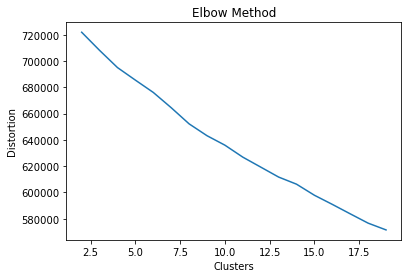

In [213]:
plt.plot(K,distortions)
plt.xlabel('Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

In [214]:
sil_coef = []
for model in models:
    labels = model.fit_predict(scale_tfidf)
    sil_coef.append(silhouette_score(scale_tfidf,labels))

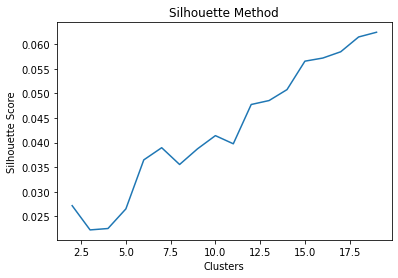

In [215]:
plt.plot(K,sil_coef)
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

In [166]:
from sklearn.metrics import silhouette_score

In [167]:
sil_coef = []
K = range(2,20)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    labels = kmeanModel.fit_predict(tfidf)
    sil_coef.append(silhouette_score(tfidf,labels))

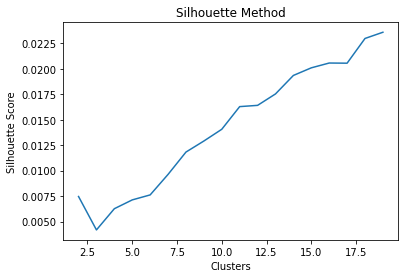

In [168]:
plt.plot(K,sil_coef)
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

In [231]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer

In [232]:
count_vectorizer = CountVectorizer(stop_words='english',min_df = 2,max_df=0.75,token_pattern='[a-z][a-z][a-z]+')
count_data = count_vectorizer.fit_transform(lemmatized_reviews)

In [239]:
lda = LDA(random_state=99)
n_top = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plxs = []

for k in n_top:
    lda = LDA(n_components=k)
    lda.fit(count_data)
    
    plx = lda.perplexity(count_data)
    plxs.append(plx)

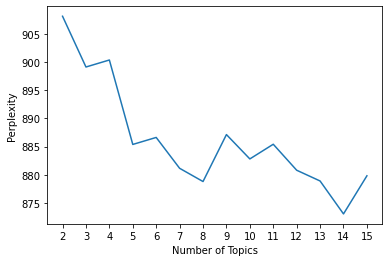

In [240]:
plt.plot(n_top,plxs)
plt.xticks(n_top)
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.show()

In [241]:
lda = LDA(random_state=99,n_components=8)
lda.fit(count_data)

LatentDirichletAllocation(n_components=8, random_state=99)

In [242]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [243]:
print_topics(lda,count_vectorizer,20)


Topic #0:
use make recipe add sugar cup good like great flour sweet muffin instead butter time just thanks really little brown

Topic #1:
make recipe use cheese good great thanks love just like time try easy sauce taste chili really think thank add

Topic #2:
make salad use recipe thanks great love lemon good really dress just nice juice add like flavor fresh zwt delicious

Topic #3:
use make add recipe soup good thanks great pepper easy like really love tomato didn just instead dish onion green

Topic #4:
make use recipe thanks great like add good just pizza pac really milk love taste spring strawberry think time drink

Topic #5:
make recipe use pie good cream thanks easy add great love crust time sugar like just delicious pancake apple taste

Topic #6:
recipe make use sauce add chicken good time thanks cook great easy just love like delicious dish really think flavor

Topic #7:
make recipe cake use bread time good great just easy bake thanks like taste add dough love chocolate try p

In [245]:
import numpy as np

In [247]:
recipe_clusters = pd.DataFrame(np.round(lda.transform(count_data),3))

In [249]:
for i in range(len(recipe_clusters)):
    recipe_clusters.loc[i,'cluster'] = np.argmax(recipe_clusters.loc[i])
    
recipe_clusters['cluster'] = recipe_clusters['cluster'].astype(int)

In [254]:
reviews

,user_id,recipe_id,date,rating,review
0,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
1,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
2,522099,424415,2010-05-21,5,I really didn't expect to like this rice as mu...
3,171790,424415,2010-05-22,4,What a wonderful aroma while cooking. Dinner g...
4,491979,424415,2010-05-24,5,Perfect rice. We love Basmati RiceMade for ZWT...
...,...,...,...,...,...
76361,199020,82303,2013-03-18,5,5 stars for taste! I had a hard time getting m...
76362,1122988,82303,2014-07-08,5,This was amazingly delicious! The only change...
76363,2000137415,82303,2015-04-13,1,I&#039;ve improvised sauces that turned out be...
76364,2001898209,82303,2018-07-05,5,This is the best and easiest hot fudge ever. I...


In [255]:
review_corpus['cluster'] = recipe_clusters['cluster']

In [256]:
review_corpus

,id,review,cluster
0,85009,I made the Mexican topping and took it to bun...,1
1,424415,I really didn't expect to like this rice as m...,6
2,33486,This is pretty good !! I used frozen spinach ...,3
3,116953,this is a nice recipe to have if you make alo...,0
4,435357,This does have a nice fresh taste. I used cr...,3
...,...,...,...
14789,394419,This was so delicious! And I love the fact th...,7
14790,253419,Yummy! We didn't have any m&m's or chocolate ...,0
14791,290157,Yet another great spice mix (& that includes ...,6
14792,190698,I made this recipe with blackberry jam instea...,2


In [252]:
import pickle

In [261]:
review_corpus.to_pickle('./recipe_cluster.pkl')

In [259]:
pd.read_pickle('recipe_cluster.pkl')

,id,review,cluster
0,85009,I made the Mexican topping and took it to bun...,1
1,424415,I really didn't expect to like this rice as m...,6
2,33486,This is pretty good !! I used frozen spinach ...,3
3,116953,this is a nice recipe to have if you make alo...,0
4,435357,This does have a nice fresh taste. I used cr...,3
...,...,...,...
14789,394419,This was so delicious! And I love the fact th...,7
14790,253419,Yummy! We didn't have any m&m's or chocolate ...,0
14791,290157,Yet another great spice mix (& that includes ...,6
14792,190698,I made this recipe with blackberry jam instea...,2


In [272]:
recipe_to_cluster = {}

for recipe in ids:
    recipe_to_cluster[recipe] = int(review_corpus[review_corpus['id']==recipe]['cluster'])

In [275]:
with open('recipe_to_cluster.pkl', 'wb') as handle:
    pickle.dump(recipe_to_cluster, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [280]:
cluster_to_recipe = {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[]}

for recipe in ids:
    cluster = recipe_to_cluster[recipe]
    cluster_to_recipe[cluster].append(recipe)

In [278]:
mat = count_data.toarray()

In [285]:
recipe_to_index = {recipe:index for index,recipe in enumerate(ids)}

In [293]:
most_sim_recipes = {}
for recipe in ids:
    cluster = recipe_to_cluster[recipe]
    related = cluster_to_recipe[cluster]
    idx = recipe_to_index[recipe]
    vec = mat[idx]
    
    min_diff = float('inf')
    top_id = 0
    
    for related_id in related:
        if related_id != recipe:
            related_idx = recipe_to_index[related_id]
            related_vec = mat[related_idx]
            diff = np.linalg.norm(vec-related_vec)
            if diff < min_diff:
                min_diff = diff
                top_id = related_id
    
    most_sim_recipes[recipe] = top_id

In [294]:
most_sim_recipes

{85009: 325940,
 424415: 424105,
 33486: 142005,
 116953: 360860,
 435357: 319854,
 241799: 232051,
 82122: 420944,
 211570: 19655,
 120964: 122993,
 223868: 306535,
 264085: 443657,
 232039: 369011,
 232041: 102463,
 232051: 68154,
 512986: 368594,
 200083: 170482,
 261427: 195642,
 291490: 488711,
 27266: 463573,
 166865: 387055,
 67055: 75535,
 53518: 55894,
 239952: 96671,
 472331: 78351,
 58209: 238557,
 78253: 251761,
 251555: 360713,
 24554: 74465,
 41230: 143389,
 29467: 530924,
 395825: 66536,
 417624: 90867,
 424551: 128133,
 114139: 211671,
 181879: 507026,
 38535: 143389,
 27809: 151461,
 275423: 72468,
 404335: 387055,
 450014: 389496,
 123038: 235610,
 359137: 57184,
 232083: 327994,
 188566: 122427,
 273976: 90414,
 60759: 284101,
 98967: 517455,
 343369: 170678,
 105645: 265340,
 443155: 57795,
 21936: 87433,
 83110: 524990,
 274774: 25012,
 121930: 514796,
 376236: 238025,
 243700: 323178,
 86774: 8097,
 203418: 217970,
 195833: 326550,
 216865: 192729,
 29626: 391257,

In [295]:
with open('most_sim_recipes.pkl', 'wb') as handle:
    pickle.dump(most_sim_recipes, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [297]:
temp = pd.DataFrame(reviews.groupby('recipe_id').agg({'recipe_id':'count','rating':'mean'})).rename(columns={'recipe_id':'count'})

In [308]:
float(temp[temp['count']==111]['rating'])

4.405405405405405